In [9]:
import os
import pandas as pd
import numpy as np
from craigslist import CraigslistHousing #this is a modified version that extracts more info
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sqlite3

sns.set_style("darkgrid", {"axes.facecolor": ".95"})

matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
import sys
sys.path.insert(0, '/Users/alexpapiu/Documents/Craiglist_Project')

#/Users/alexpapiu/Documents/Craiglist_Project/cl_pipeline.py

import cl_pipeline

In [6]:
os.chdir("/Users/alexpapiu/Documents/Data/Craigslist")

In [7]:
conn = sqlite3.connect("housing.db")
data = pd.read_sql_query("select * from cl_housing", con = conn).drop_duplicates()

In [8]:
data.shape

(57380, 13)

In [ ]:
#data.to_sql("cl_housing_clean", conn, index = False)

In [10]:
data = cl_pipeline.clean_data(data)

In [11]:
data["where"] = (data["where"].str.replace(r"[^\w\s-]", " ")
                              .str.replace(" +", " ")
                              .str.strip())

In [12]:
data.shape

(57250, 17)

In [13]:
data.to_sql("cl_housing_clean", conn, index = False, if_exists="replace")

In [14]:
data.isnull().sum()

id                0
datetime          0
geotag        57250
has_image         0
has_map           0
id.1          33621
name              0
num_bed        2442
price             0
sq_feet       41039
url               0
where          2136
area              0
dayofweek         0
hour              0
int_bed        2442
per_person     2442
dtype: int64

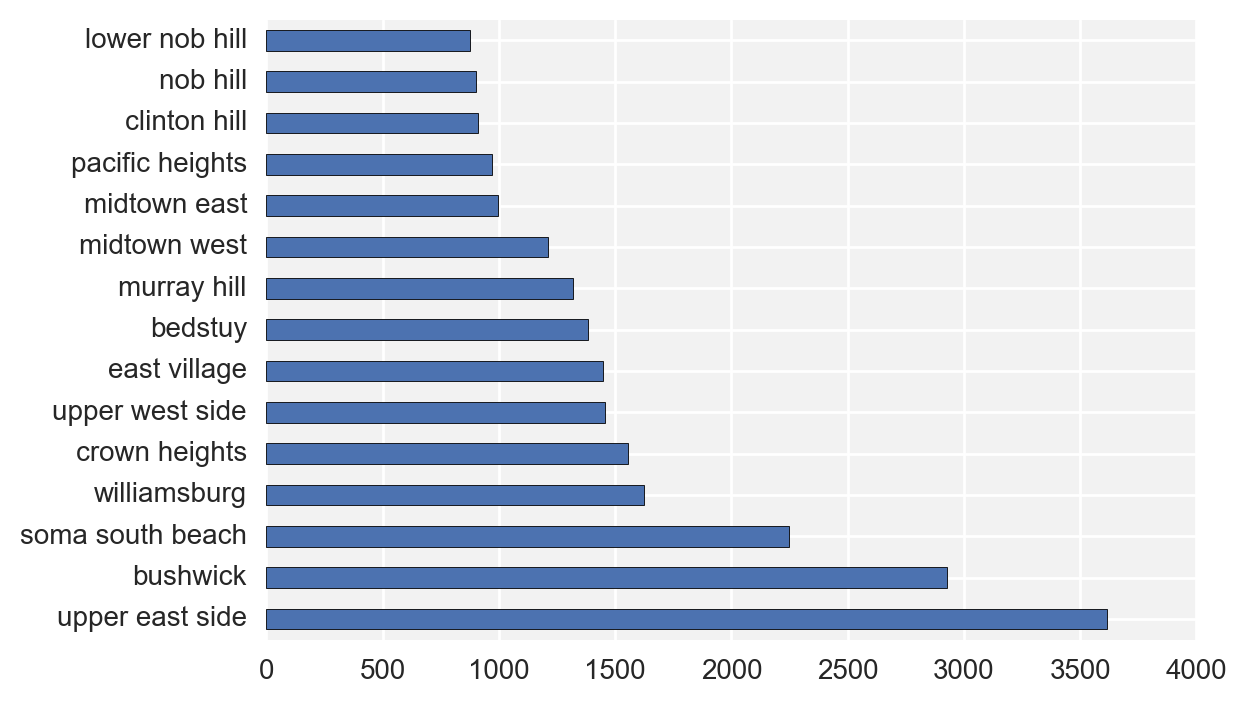

In [15]:
data["where"].value_counts()[:15].plot(kind = "barh")

In [16]:
data.head(3)

,id,datetime,geotag,has_image,has_map,id.1,name,num_bed,price,sq_feet,url,where,area,dayofweek,hour,int_bed,per_person
0,5774898506,2016-09-10 04:06:00,None,0,0,5.774899e+09,very large apt stunning ?luxury 3 bedroom,3,1670.0,NaN,http://newyork.craigslist.org/brk/abo/57748985...,flatbush,newyorkbrk,5,4,3.0,556.666667
1,5774903240,2016-09-10 03:58:00,None,0,0,5.774903e+09,super awesome two br ?heat incl apartment for ...,NaN,1182.0,NaN,http://newyork.craigslist.org/brk/abo/57749032...,williamsburg,newyorkbrk,5,3,NaN,NaN
2,5774900841,2016-09-10 03:54:00,None,0,0,5.774901e+09,? looking for roommate :) sunny new apt in wil...,3,1400.0,NaN,http://newyork.craigslist.org/brk/abo/57749008...,williamsburg,newyorkbrk,5,3,3.0,466.666667


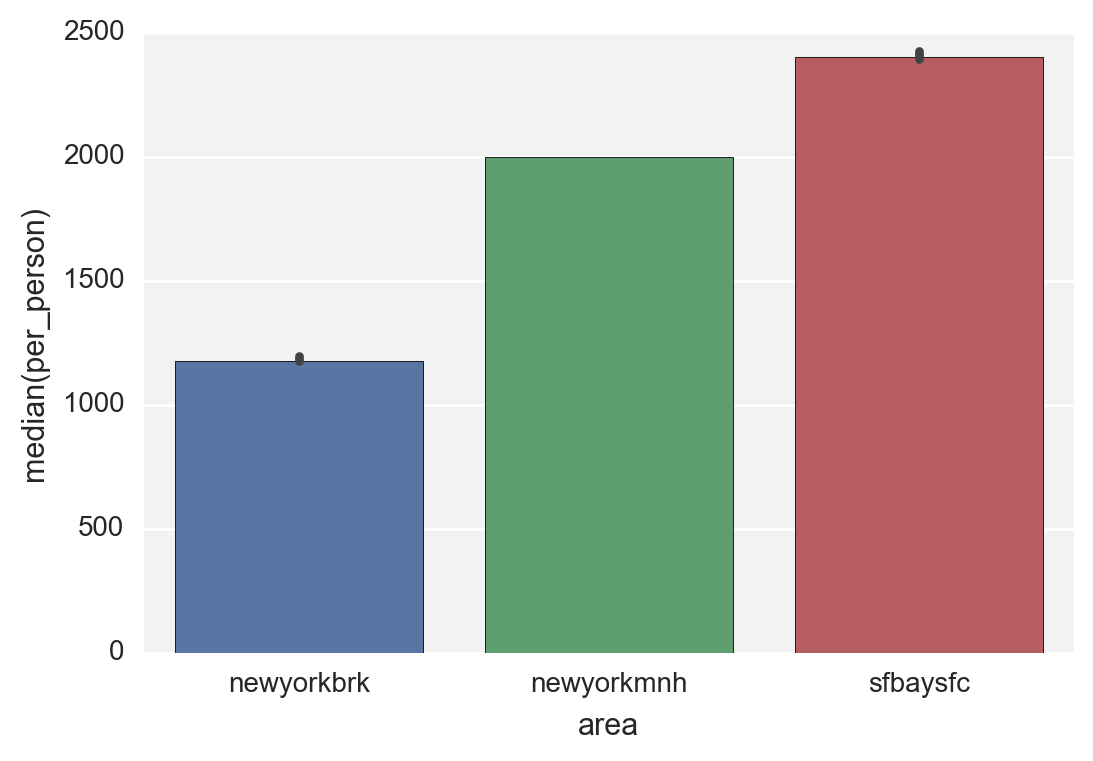

In [17]:
sns.barplot(x = "area", y = "per_person", data = data, estimator = np.median)

In [18]:
data["num_bed"][4]

2.0

In [19]:
data.loc[data["num_bed"].isin(["5", "6", "7", "8"])]

,id,datetime,geotag,has_image,has_map,id.1,name,num_bed,price,sq_feet,url,where,area,dayofweek,hour,int_bed,per_person


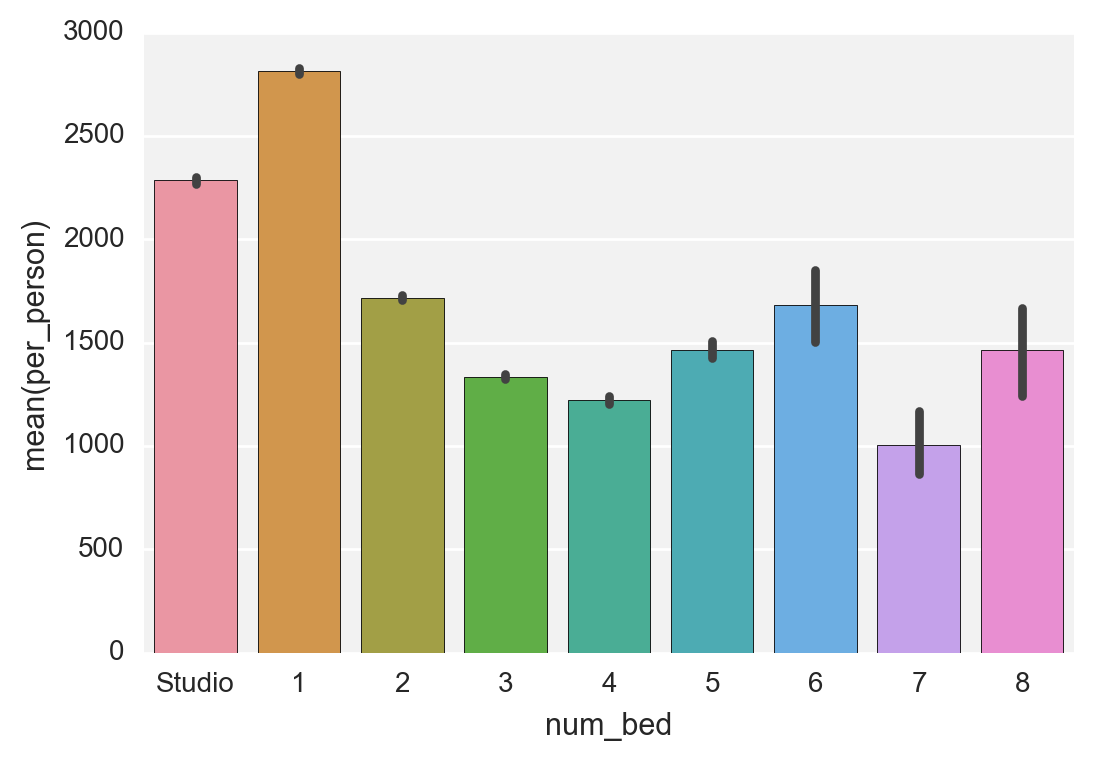

In [20]:
sns.barplot(x = "num_bed", y = "per_person", data = data, estimator = np.mean, n_boot = 1000,
           order = ["Studio", 1, 2, 3, 4, 5, 6, 7, 8])

Hmm why does a 5 bedroom cost more than a 4 bedrooom per person?

In [21]:
data[data["num_bed"] == 6]

,id,datetime,geotag,has_image,has_map,id.1,name,num_bed,price,sq_feet,url,where,area,dayofweek,hour,int_bed,per_person
183,5770513429,2016-09-09 23:09:00,None,1,1,5.770513e+09,"2 fl townhouse with patio, yard & central ac ...",6,5000.0,NaN,http://newyork.craigslist.org/brk/abo/57705134...,l m myrtle-wyckoff m knickerbocker,newyorkbrk,4,23,6.0,833.333333
187,5770512757,2016-09-09 23:08:00,None,1,1,5.770513e+09,"2 fl townhouse with patio, yard & central ac ...",6,5000.0,NaN,http://newyork.craigslist.org/brk/abo/57705127...,l m myrtle-wyckoff m knickerbocker,newyorkbrk,4,23,6.0,833.333333
194,5770455287,2016-09-09 23:07:00,None,1,1,5.770455e+09,townhouse 2 floors renovated central ac ...,6,5000.0,NaN,http://newyork.craigslist.org/brk/abo/57704552...,l m myrtle-wyckoff m knickerbocker,newyorkbrk,4,23,6.0,833.333333
2478,5767603018,2016-09-08 18:03:00,None,1,1,5.767603e+09,2 floor townhouse__private deck shared yard__h...,6,5000.0,NaN,http://newyork.craigslist.org/brk/abo/57676030...,l m myrtle-wyckoff m knickerbocker,newyorkbrk,3,18,6.0,833.333333
2481,5767518815,2016-09-08 18:03:00,None,1,1,5.767519e+09,2 floor townhouse__private deck shared yard__h...,6,5000.0,NaN,http://newyork.craigslist.org/brk/abo/57675188...,l m myrtle-wyckoff m knickerbocker,newyorkbrk,3,18,6.0,833.333333
3038,5773777095,2016-09-09 14:12:00,None,1,1,5.773777e+09,the masterpiece - 6br 2bath - never lived in- ...,6,4495.0,2000.0,http://newyork.craigslist.org/mnh/abo/57737770...,inwood wash hts,newyorkmnh,4,14,6.0,749.166667
4473,5736650821,2016-09-08 12:30:00,None,1,1,5.736651e+09,?true 6bds ~~ washer dryer ~~central air~~3 ...,6,11000.0,2800.0,http://newyork.craigslist.org/mnh/abo/57366508...,chelsea,newyorkmnh,3,12,6.0,1833.333333
4626,5771873303,2016-09-08 11:42:00,None,1,1,5.771873e+09,****entire floor 3000sq ft union sq-- 6br--loft,6,11950.0,3000.0,http://newyork.craigslist.org/mnh/abo/57718733...,flatiron,newyorkmnh,3,11,6.0,1991.666667
5398,5774480587,2016-09-09 15:51:00,None,1,1,5.774481e+09,6 bd 4 ba potrero hill home w viking kitchen ...,6,9995.0,NaN,http://sfbay.craigslist.org/sfc/apa/5774480587...,potrero hill,sfbaysfc,4,15,6.0,1665.833333
6058,5773950812,2016-09-09 10:49:00,None,1,1,5.773951e+09,"designer 4-level 6bd 4.5ba house w views!!, 3...",6,18500.0,NaN,http://sfbay.craigslist.org/sfc/apa/5773950812...,richmond seacliff,sfbaysfc,4,10,6.0,3083.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1150c27b8>]], dtype=object)

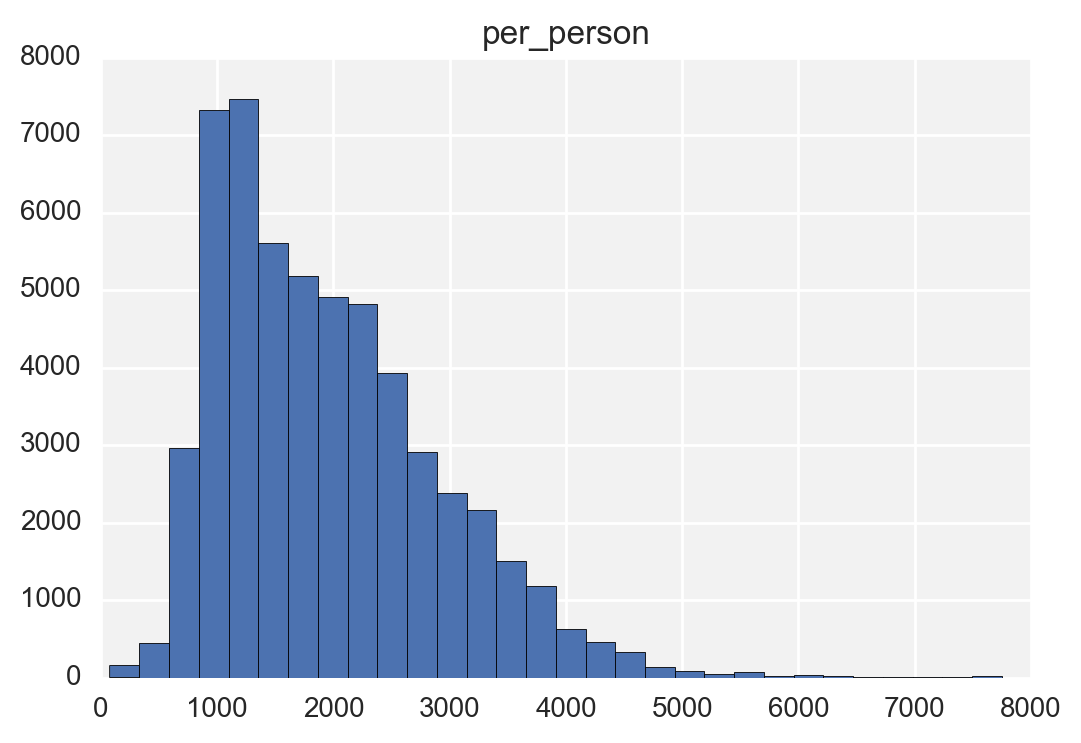

In [22]:
data.query("per_person < 8000").hist("per_person", bins = 30)

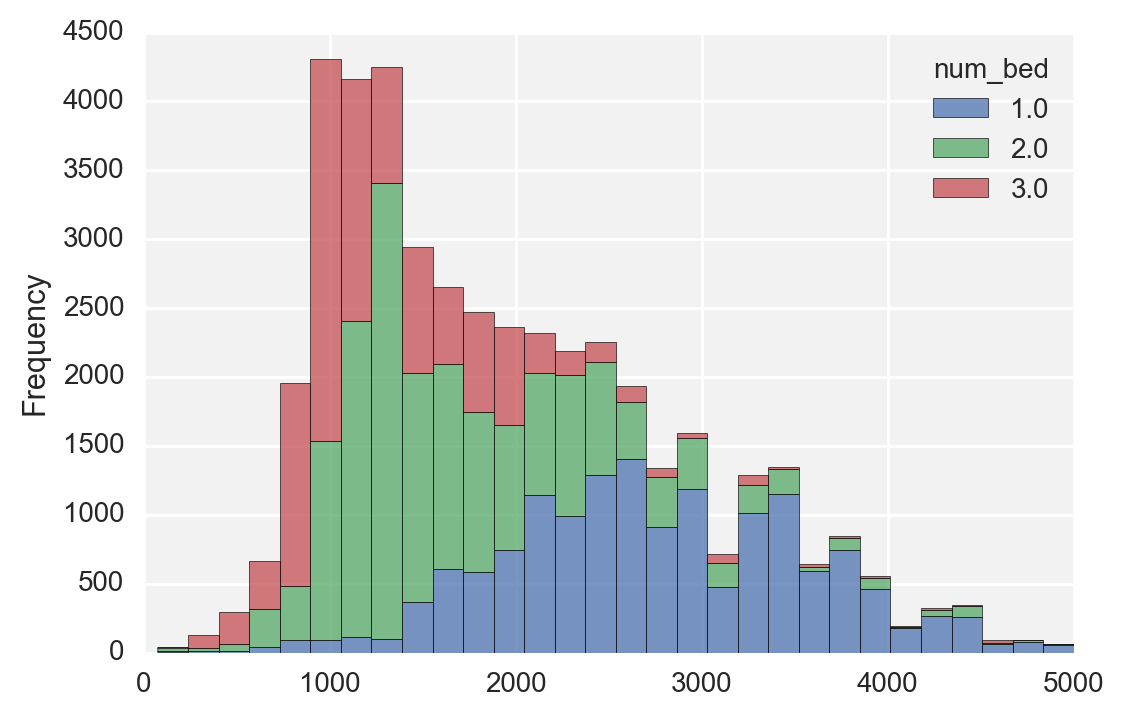

In [23]:
(data[data["num_bed"].isin([1, 2, 3])].query("per_person < 5000")[["num_bed", "per_person"]]
     .pivot(columns = "num_bed", values = "per_person")
     .plot.hist(alpha = 0.75, bins = 30, stacked = True))

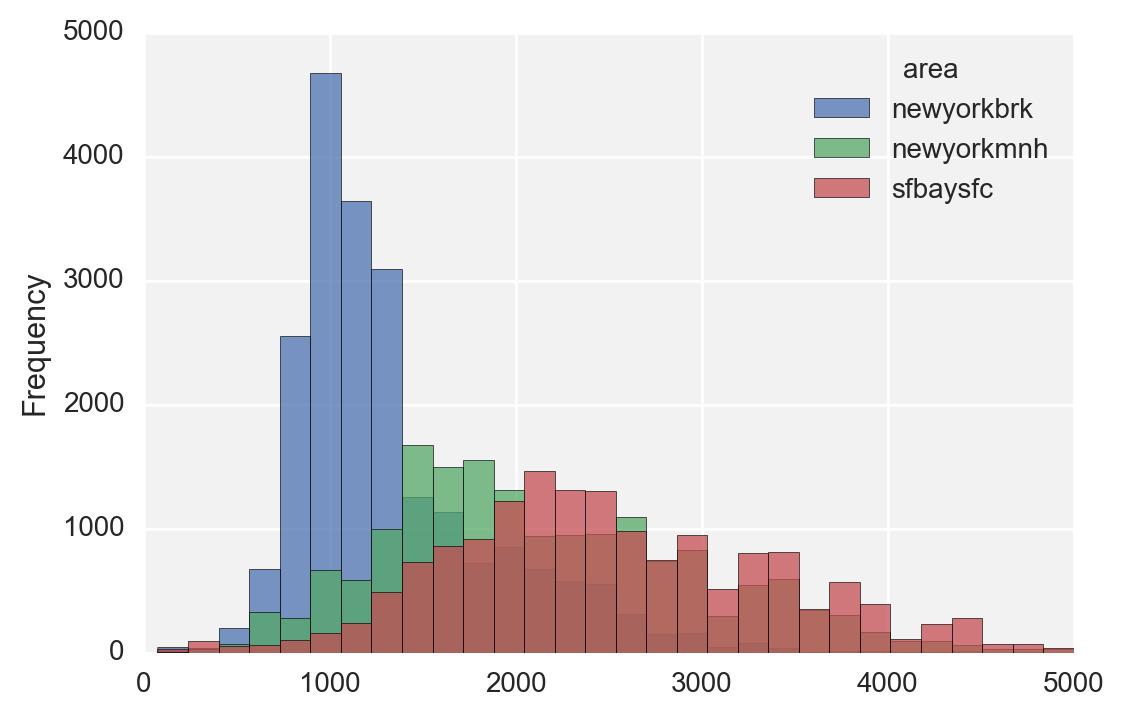

In [24]:
(data.query("per_person < 5000")[["area", "per_person"]]
     .pivot(columns = "area", values = "per_person")
     .plot.hist(alpha = 0.75, bins = 30, stacked = False))

So if you want something under 1500 bk is probably your best best.

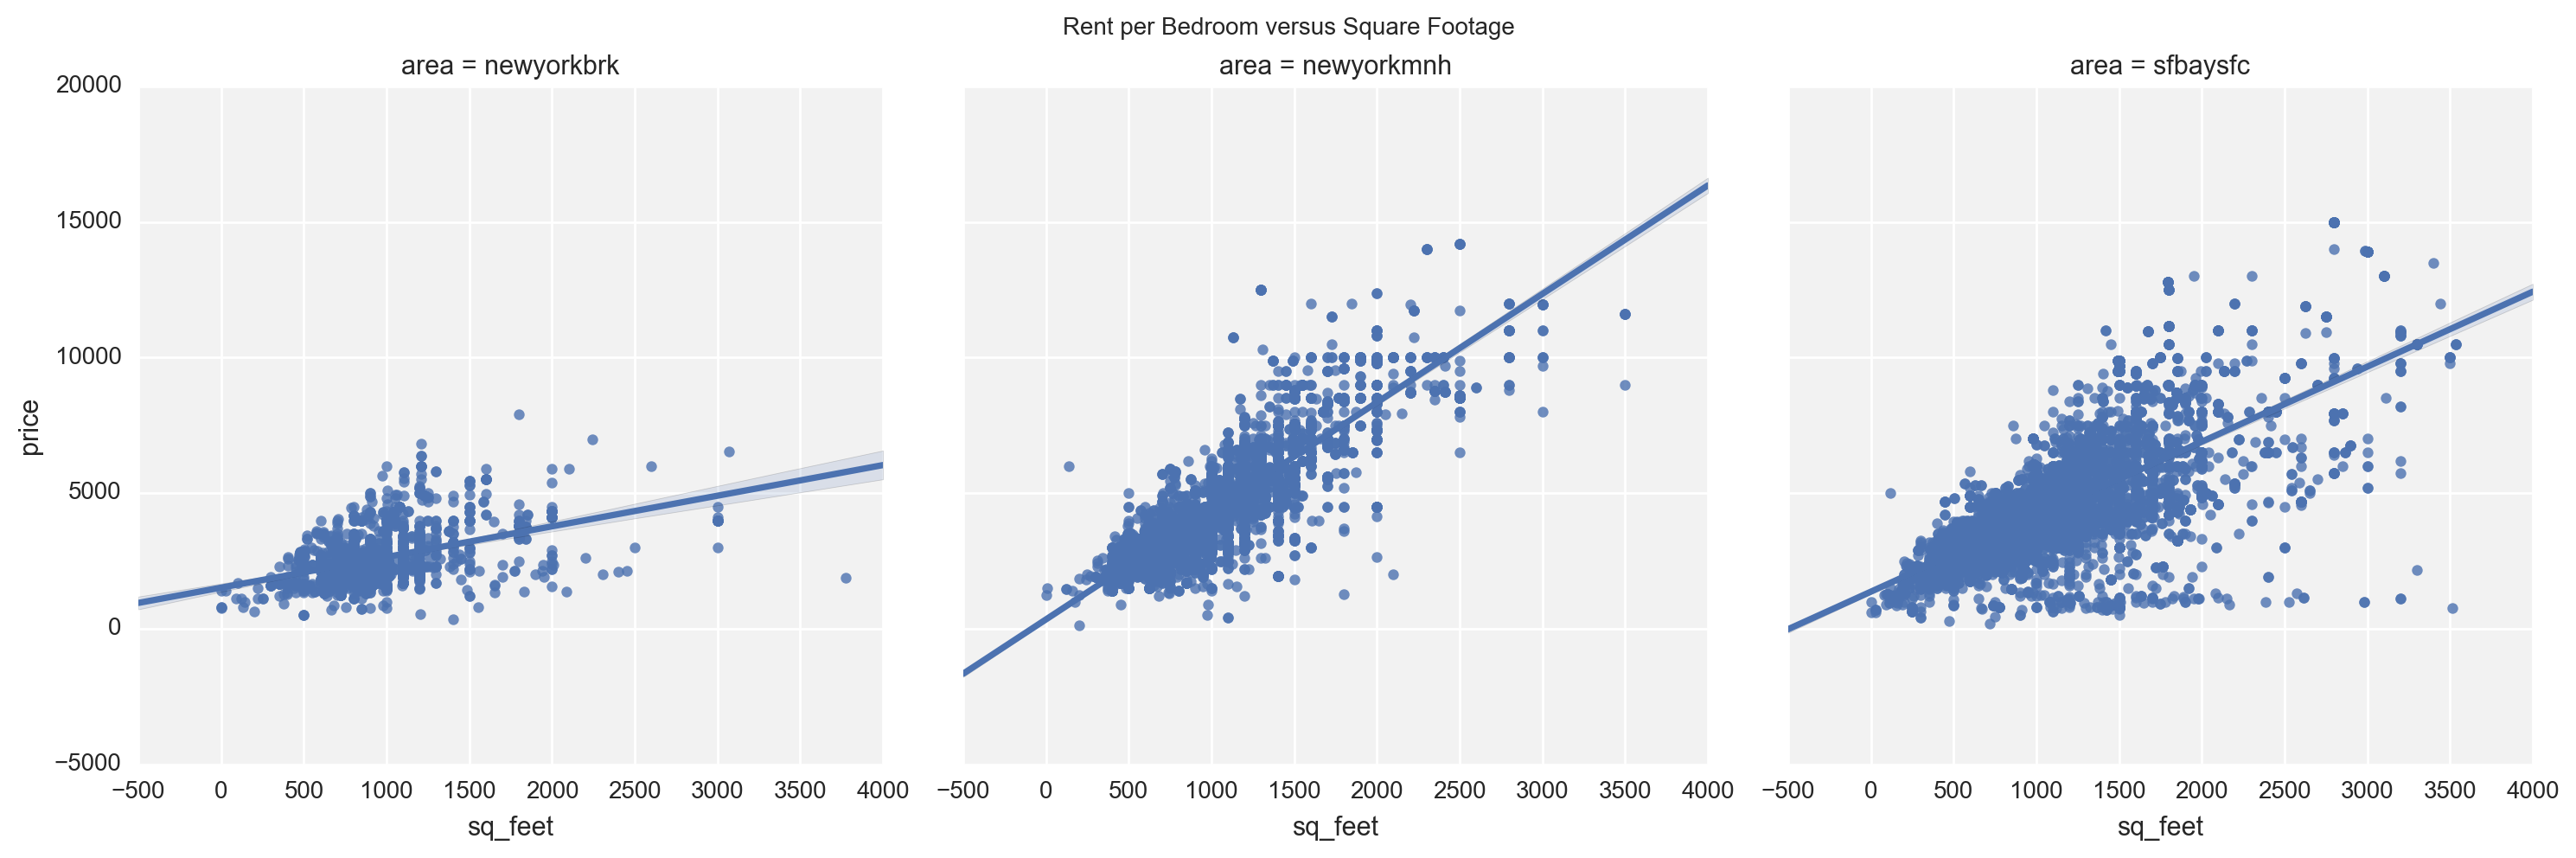

In [39]:
g = sns.lmplot(x = "sq_feet", y = "price",
           data=data.query("sq_feet < 4000 & price < 15000"),
           col = "area", fit_reg=True)


plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rent per Bedroom versus Square Footage')

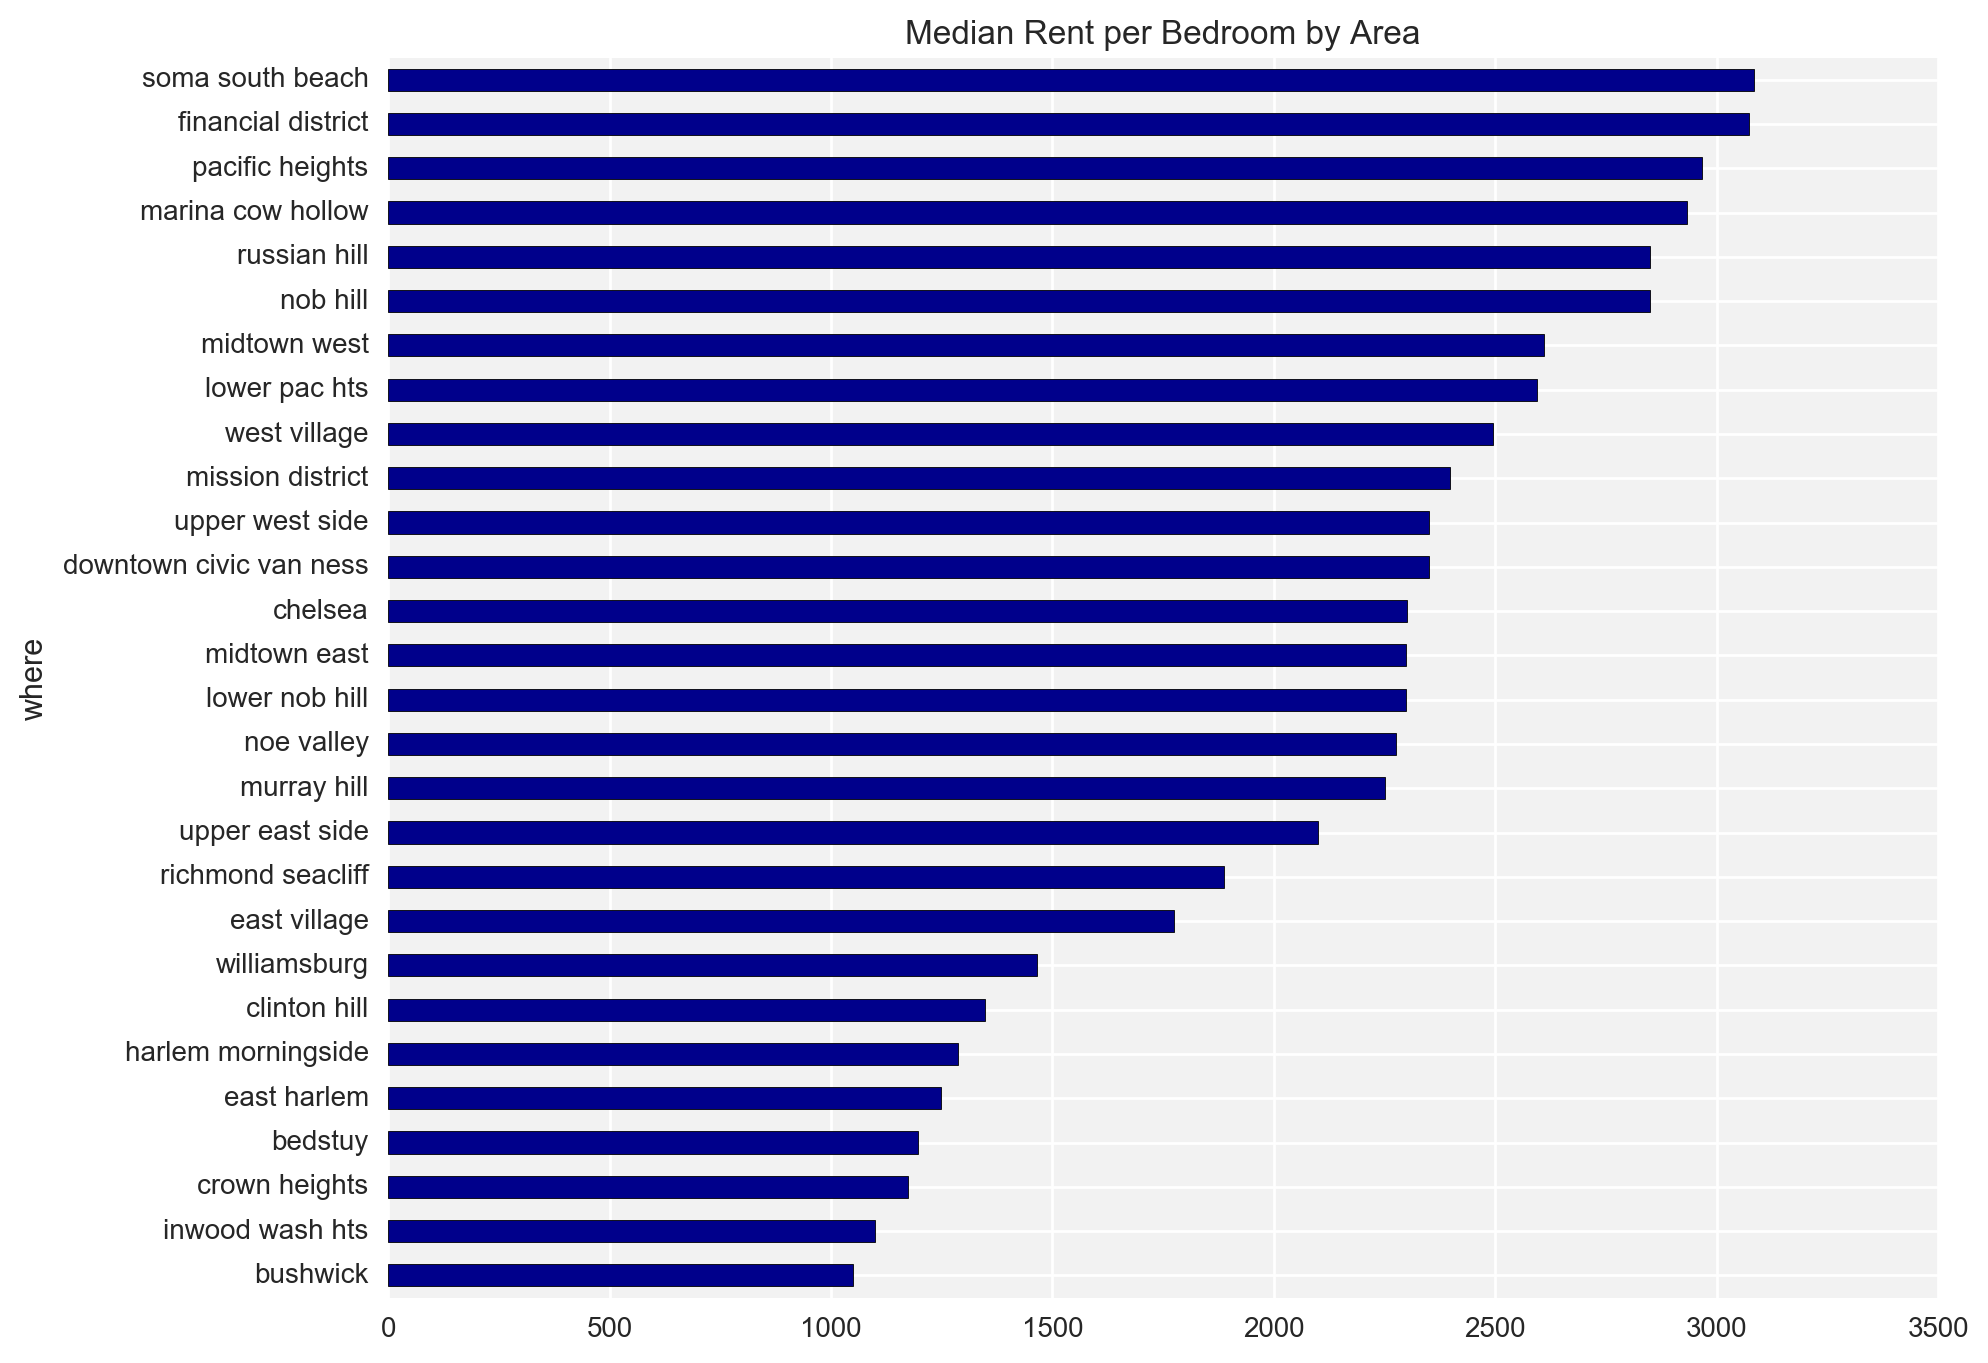

In [32]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

price_by_locations = (data.groupby("where")["per_person"]
                          .aggregate(["median", "count"])
                          .query("count > 500")
                          .sort_values("median"))
price_by_locations["median"].plot.barh(title = "Median Rent per Bedroom by Area", color = "darkblue")